# Churning Customers
# Goal:
* Discover drivers of churn in telco dataset
* Use drivers to develop a machine learning model to classify customers as likely to churn or not likely to churn

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

import acquire
from scipy import stats
import re

import prepare as p

# Acquire
* Data acquired from telco.csv file
* It contained 7043 rows and 24 columns before cleaning
* Each row represents a customer in the telco database
* Each column represents a feature of the customer

# Prepare

##### Prepare Actions:
* Removed columns that did not contain useful information
* Rename columns to promote readability
* Checked for null in the data
* Checked that colmn data types were appropriate
* Removed white space from values in object columns
* Encoded categorical variables
* Split data into train, validate, and test, stratifying on 'churn'
* Scaled continous variables
* Outliers have not been removed from this iteration  of the project

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|Churn| True or False, whether a customer churned or not|
|Monthly Charges| The amount a customer is charged each month|
|Tenure| The amount of time a customer has been with the company, measured in months|
|Senior Citizen| True or False, whether a customer is a senior citizen or not|
|Female Yes| True or False, whether a customer is female or not|

In [2]:
# aquiring data and looking at the data
df = acquire.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
# aquiring, cleaning, and adding features to data
df = p.prep_telco(df)

In [4]:
# splitting data into train, validate, and test
train, validate, test = p.split_telco_data(df)

## A brief look at the data

In [5]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


## A summery of the data

In [6]:
train.describe()

,senior_citizen,tenure,monthly_charges,Female_Yes,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,0.094742,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,0.292896,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## How often does churning occur?

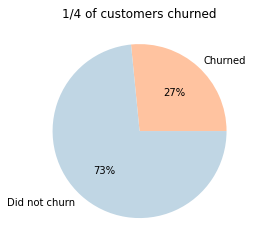

In [7]:
# get pie chart churning
p.get_pie_churn(train)

###### about 1/4 of the customers in the training data will churn

## Does Tenure affect churn?

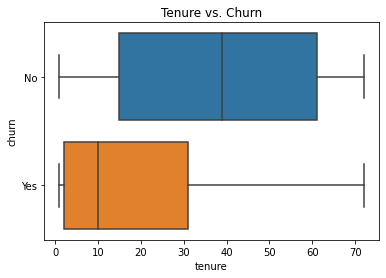

In [8]:
# get barplot
p.get_tenure(train)

###### The greater the tenure of a customer the less likely they are to churn

##### I will now use a chi-square test to investigate whether 'churn' and 'tenure' are related
* I will use a confidence interval of 95%
* The resulting alpha is .05

#### H_0: 'churn' and 'tenure' are independent of one another
#### Ha: 'churn' and 'tenure' are related

In [9]:
#get chi-square results
p.get_chi_tenure(train)

chi^2 = 626.7233
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'churn' and 'tenure' are related. Based on this I believe that using the 'tenure' feature in modeling will likely have a positive impact on the model's accuracy.

## Does monthly charges affect churn?

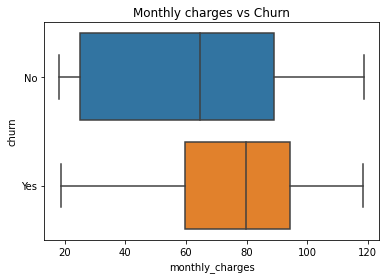

In [10]:
#get barplot
p.get_monthly_charges(train)

###### The higher the monthly charges the more likely someone will churn

## Does being a senior citizen effect the likelyhood of churn?

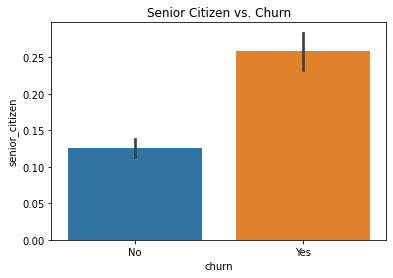

In [11]:
#show chart
p.get_senior_citizen(train)

###### Someone that is a senior citizen is more likely to churn

##### I will now use a chi-square test to investigate whether 'churn' and 'senior_citizen' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

In [12]:
#get chi-square results
p.get_chi_senior_citizen(train)

chi^2 = 99.7192
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'churn' and 'senior_citizen' are related. Based on this I believe that using the 'senior_citizen' feature in modeling will likely have a positive impact on the model's accuracy.

## Do females churn more than males?

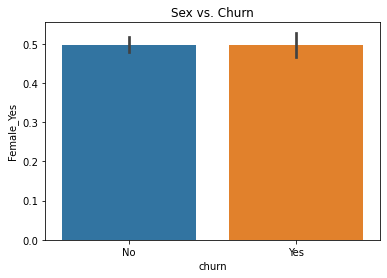

In [13]:
#show bar chart
p.compare_sex(train)

##### Being female does not affect churn

# Exploration Summary
* "Senior Citizen" was found to be a driver of "churn"
* "Tenure" was found to be a driver of "churn"
* "Monthly charges" was found to be a driver of "churn"
* "Female_Yes" was not found to be a driver of "churn"

# Features I am moving to modeling with
* "Senior Citizen" (There is evidence that senior citizen is a driver of churn)
* "Monthly Charges" (There is evidence that monthly charges is a driver of churn)
* "Tenure" (There is evidence that tenure is a driver of churn)

# Features I am not moving to modeling with
* "Female_Yes" (There is no evidence that Female_Yes is a driver of churn)

# Modeling
    * I will use accuracy as my evaluation metric
    * Non-churns makeup 73% of the data
    * By guessing non-churn for every customer one could achieve an accuracy of 73%
    * 73% will be the baseline accuracy I use for this project
    * I will be evaluating models developed using four different model types and various hyperparameter configurations
    * Models will be evaluated on train and validate data
    * The model that performs the best will then be evaluated on test data

In [1]:
# Prep data for modeling
train_X, validate_X, test_X, train_y, validate_y, test_y = p.model_prep(train, validate, test)

NameError: name 'p' is not defined

## Decision Tree

In [15]:
# get Decisoon Tree results
p.get_tree(train_X, validate_X, train_y, validate_y)

Accuracy of Decision Tree on train data is 0.8054356108712217
Accuracy of Decision Tree on validate data is 0.7766587677725119


## Random Forest

In [16]:
# get Random Forest results
p.get_forest(train_X, validate_X, train_y, validate_y)

Accuracy of Random Forest on train is 0.7955295910591821
Accuracy of Random Forest on validate is 0.7808056872037915


## Logistic Regression 

In [17]:
# get Logistic Regression results
p.get_reg(train_X, validate_X, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.7896875793751588
Accuracy of Logistic Regression on validate is 0.7796208530805687


## KNN

In [18]:
# get KNN results
p.get_knn(train_X, validate_X, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.8359156718313436
Accuracy of Logistic Regression on validate is 0.7577014218009479


# Comparing Models
* Decision Tree, Random Forest, KNN, and Logistic Regression all perform above above the baseline of 73%
* KNN had the largest disparity in percentage with 8% so it will be disqualified. It is likely overfit.
* Because the results of the Decision Tree, Random Forest, and Logistic Regression models were all very similar I could proceed to test with any of these models.
* I have chosen to move forward with the Random Forest model

# Random Forest on Test

In [19]:
# get test results for final model
p.get_forest_test(train_X, test_X, train_y, test_y)

Accuracy of Random Forest on test is 0.7960199004975125


## Modeling Summary
* Decision Tree, Random Forest, Logistic Regression, and KNN  models all performed above the baseline on train and validate
* The KNN model performed slighlty better on train data but was worse on validate data. It is likely overfit.
* A Random Forest model selected as the final model and had an accuracy of about 79% which is above the baseline accuracy

# Conclusions

## Exploration
* Churning occurs in about 1/4 of customers
* Customers with a high tenure are less likely to churn
* Customers with high monthly charges are more likely to churn
* Customers that are senior citizens are more likely to churn
* The gender of a customer has no provable effect on the chance of a churn

## Modeling

#####  The final model performed 6% better then the baseline. Possible reasons include:
* "Tenure" and "Senior citizen" each performed very well
* "Monthly charges" is a driver but not a significant one

## Recommendations
* To decrease the amount of churn customers that are beginning their tenure should be offered lower monthly rates to incentivise them not to churn

## Next Steps
* Cluster together tenure into blocks such as short-term, mid-term, long-term to better understand when customers are likely to churn
* Look for ways to describe why customers churn such as if they had to cancel due to moving out of country